### Imports

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
seed = 42

### Reading the database and EDA

In [47]:
df = pd.read_csv('Student_Performance.csv')
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
df.isnull().sum() #check for null values, none found.

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [49]:
df_no_extracurricular = df.drop('Extracurricular Activities',axis=1)
df_no_extracurricular.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [12]:
def scatterplot(col1,col2,data):
    plt.figure()
    plt.scatter(data[col1],data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col2} vs {col1}')


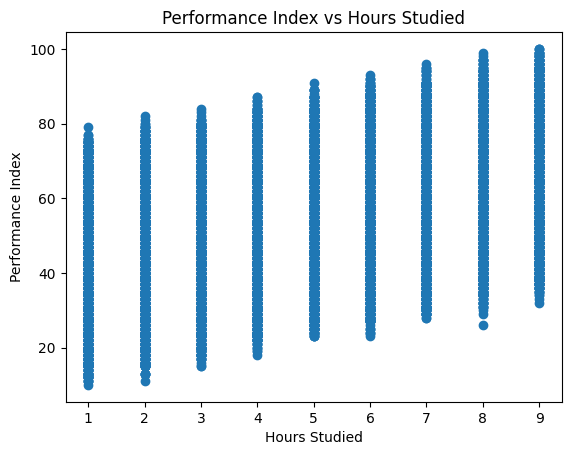

In [13]:
scatterplot('Hours Studied','Performance Index',df)

shows a clear relation

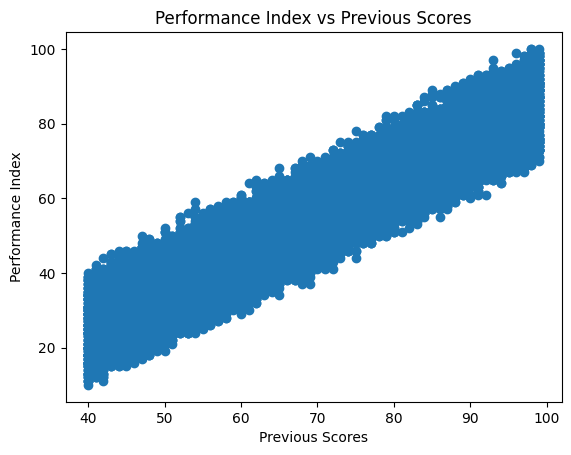

In [15]:
scatterplot('Previous Scores','Performance Index',df)

This indicates a highly positive correlation coefficient

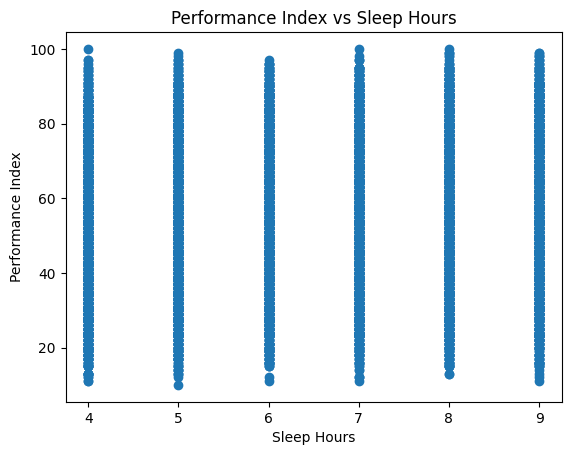

In [16]:
scatterplot('Sleep Hours','Performance Index',df)

Doesnt indicate much 

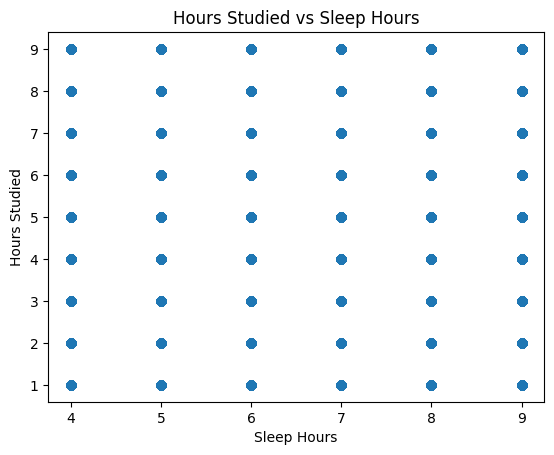

In [17]:
scatterplot('Sleep Hours','Hours Studied',df)

indicates all varities of sleep-study patterns are available in the dataset

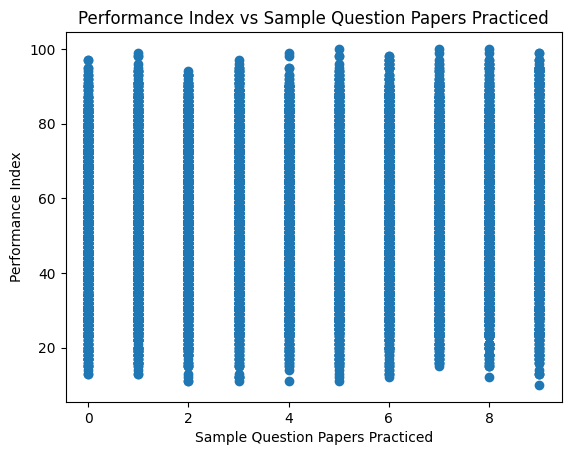

In [18]:
scatterplot('Sample Question Papers Practiced','Performance Index',df)

Does not indicate much

### Realtion between columns and Normalization of data

In [52]:
def covariance(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return np.dot(x-x_mean,y-y_mean)/(len(x)-1)

def correlation_coefficient(x,y,data):
    x = data[x]
    y = data[y]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    varx = np.sum((x-x_mean)**2)/(len(x)-1)
    vary = np.sum((y-y_mean)**2)/(len(y)-1)
    return covariance(x,y)/np.sqrt(varx*vary)

def corr_coef_data(data:pd.DataFrame):
    cols = data.columns
    matrix = np.zeros((len(cols),len(cols)))
    for i in range(len(cols)):
        for j in range(len(cols)):
            matrix[i,j] = correlation_coefficient(cols[i],cols[j],data)
    return matrix

def z_score_normalise(x):
    x_mean = np.mean(x)
    return (x-x_mean)/np.sqrt((np.sum((x-x_mean)**2)/(len(x)-1)))


Normalising the columns

In [57]:
df_no_extracurricular.apply(z_score_normalise,axis=1)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,-0.700612,1.173119,-0.659879,-0.822812,1.010185
1,-0.704233,1.300518,-0.704233,-0.755637,0.863585
2,-0.624080,1.213963,-0.666825,-0.880551,0.957492
3,-0.661944,1.412147,-0.661944,-0.794332,0.706073
4,-0.717457,1.218538,-0.688986,-0.774398,0.962303
...,...,...,...,...,...
9995,-0.717315,1.609112,-0.571913,-0.668848,0.348964
9996,-0.716806,1.192444,-0.683311,-0.783798,0.991470
9997,-0.736075,1.204944,-0.685659,-0.761283,0.978072
9998,-0.654914,1.112953,-0.695093,-0.835719,1.072774


In [197]:
print(list(df_no_extracurricular.columns))
print(corr_coef_data(df_no_extracurricular))

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
[[ 1.         -0.01238992  0.0012452   0.01746317  0.37373035]
 [-0.01238992  1.          0.00594422  0.00788803  0.91518914]
 [ 0.0012452   0.00594422  1.          0.00399022  0.04810584]
 [ 0.01746317  0.00788803  0.00399022  1.          0.04326833]
 [ 0.37373035  0.91518914  0.04810584  0.04326833  1.        ]]


### Custom Linear Regression via Gradient Descent

In [255]:
train_data_x,test_data_x,train_data_y,test_data_y = train_test_split(df_no_extracurricular.drop('Performance Index',axis=1,inplace=False),df_no_extracurricular['Performance Index'],test_size=0.2,random_state=seed)

In [276]:
class LinearRegressor:
    def __init__(self,x:np.ndarray,y:np.ndarray) -> None:
        self.x = x
        self.y = y
        self.m = len(x)
        self.n = len(x[0])
        self.w = [0]*self.n
        self.b = 0
    
    def f_wb(self,w,b,x):
        return np.dot(w,x)+b
    
    def compute_cost(self,x,y,w,b):
        f_wb = [self.f_wb(w,b,x[i]) for i in range(self.m)]
        return np.mean((f_wb - y)**2)/2
    
    def compute_gradient(self,x,y,w,b):
        dj_dw = [0]*self.n
        for j in range(self.n):
            dj_dw_j = 0
            for i in range(self.m):
                dj_dw_j += (self.f_wb(w,b,x[i])-y[i])*x[i,j]
                
            dj_dw[j] = dj_dw_j/self.m
        
        dj_db = sum([(self.f_wb(w,b,x[i])-y[i])/self.m for i in range(self.m)])

        return dj_dw,dj_db

    def gradient_descent(self,x,y,w,b,alpha,iterations=10000):
        cost_history = []
        for iteration in range(iterations):
            tmp_w = [0]*self.n
            dj_dw,dj_db = self.compute_gradient(x,y,w,b)
            for i in range(self.n):
                tmp_w[i] = w[i] - alpha*dj_dw[i]
            tmp_b = b - alpha * dj_db
            w = tmp_w
            b = tmp_b
            cost_history.append(self.compute_cost(x,y,w,b))
            if iteration%(iterations/100) == 0:
                print(iteration, cost_history[-1],w,b)
        plt.scatter(range(iterations),cost_history)
        plt.xlabel('# iterations')
        plt.ylabel('Cost fucntion value')
        plt.show()

        return w,b  

    def train(self,alpha,num_iters=10000,initial_w=None,initial_b=None):
        if initial_w:
            self.w = initial_w
        if initial_b:
            self.b = initial_b
        opt_w,opt_b = self.gradient_descent(self.x,self.y,self.w,self.b,alpha,num_iters)
        self.opt_w = opt_w
        self.opt_b = opt_b
        return opt_w,opt_b

    def predict(self,x):
        if hasattr(self,'opt_w') and hasattr(self,'opt_b'):
            return self.f_wb(self.opt_w,self.opt_b,x)
        else:
            raise Exception('Model not trained. run .train method') 
    
    def test(self,x_test,y_test):
        mse = 0
        for i in range(len(x_test)):
            predicted_val = self.predict(x_test[i])
            mse+= (predicted_val-y_test[i])**2
        mse/=len(x_test)
        
        return mse


0 33.474644443738505 [0.24366340516852658, 0.7907516099525707, 0.002619698374357309, 0.011014560763122178] -0.0026336583924961732
15 32.632899807232015 [0.29990528706079134, 0.7898788187233373, -0.019216385645327072, -0.000433876670511409] -0.006981511427276485
30 31.83774772158012 [0.3543562533462263, 0.7888880338262965, -0.04093360896331826, -0.01159904696211864] -0.011353227292625478
45 31.086264112756716 [0.4070917496822168, 0.7879819428426093, -0.06250407189430345, -0.02247035912227757] -0.015744299657478866
60 30.37582252698361 [0.4581709101161018, 0.7871558862719237, -0.08391901214712752, -0.03305059403700192] -0.020153126652047923
75 29.70396715639783 [0.5076506706836421, 0.7864054751295833, -0.10517034731360508, -0.04334283815762782] -0.024578192292781534
90 29.068400974510315 [0.5555858540826405, 0.7857265390174014, -0.12625064159877153, -0.053350455053669595] -0.029018062766702494
105 28.46697474797442 [0.6020292534300928, 0.7851151154945247, -0.1471530707671124, -0.06307705

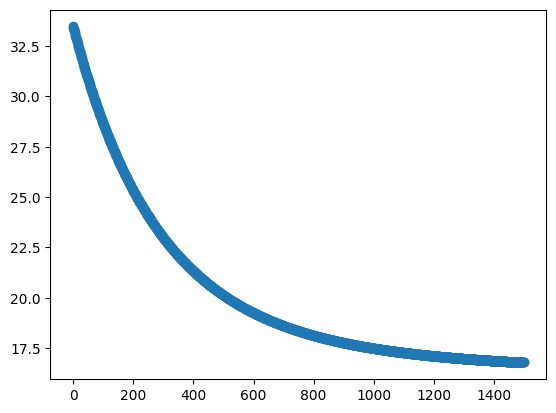

([2.0560038348064045,
  0.8040067885063793,
  -1.2324436026827237,
  -0.3068764068047334],
 -0.4398124359742716)

In [256]:
lr = LinearRegressor(train_data_x.to_numpy(),train_data_y.to_numpy())
w_init = [0.23988890915747627, 0.7914008032483585, 0.004132206038950524, 0.011825268083624102]
b_init= -0.0023366278759614986
lr.train(3e-4,1500,w_init,b_init)

In [257]:
lr.test(test_data_x.to_numpy(),test_data_y.to_numpy())

35.50873200947085

### K-fold Regression for the given data

In [266]:
overall_train_data,overall_test_data = train_test_split(df_no_extracurricular,test_size=0.2,random_state=seed)

In [268]:
# X = df_no_extracurricular.drop('Performance Index',axis=1,inplace=False)
# Y = df_no_extracurricular['Performance Index']
X_Y = overall_train_data
k = 4
def k_fold_split(X_Y,k):
    m = len(X_Y)
    step = m//k
    train = []
    test = []
    for i in range(0,len(X_Y),step):
        test.append(X_Y[i:i+step])
        train.append(pd.concat([X_Y[:i],X_Y[i+step:]]))

    return train,test

train,test = k_fold_split(X_Y,k)

models = [None]*k
for i in range(k):
    x = train[i].drop('Performance Index',axis=1,inplace=False).to_numpy()
    y = train[i]['Performance Index'].to_numpy()
    lr = LinearRegressor(x,y)
    models[i] = lr        

Model 0/4
0 33.4871977873874 [0.24370837161100184, 0.7906474810842877, 0.0026384250822077985, 0.01100840249729235] -0.0026312850831629385
20 32.35573463939888 [0.3192877457288402, 0.7893611542480682, -0.02592267648836522, -0.004190880776301819] -0.008361620045622358
40 31.307793577749674 [0.39165659075974546, 0.787993944953696, -0.0542917059810986, -0.01887237376530847] -0.014135122328957224
60 30.33649261647267 [0.4609787657917117, 0.7867784940607727, -0.08242336174789372, -0.033027661287416854] -0.019944384940119353
80 29.43569280679234 [0.5273943639510499, 0.7857039160143398, -0.11029626970861708, -0.0466645667451458] -0.02578559530171318
100 28.5997853220109 [0.5910365498742848, 0.7847600343935429, -0.13789120313941547, -0.059791748151765606] -0.031655210288435244
120 27.823642658100795 [0.6520319240179963, 0.7839373396580094, -0.1651909307436084, -0.07241858000828738] -0.03754993873743028
140 27.102574582575965 [0.7105008666196336, 0.7832269465047687, -0.1921800748827193, -0.08455

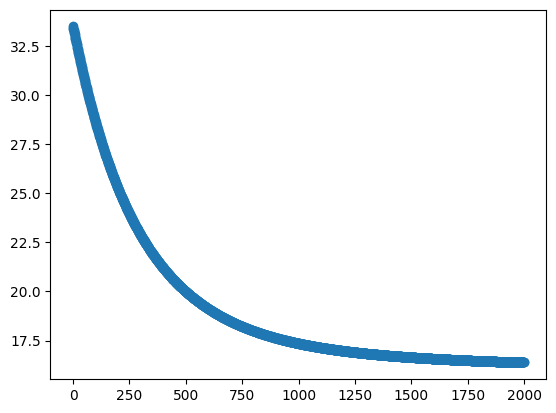

Model 1/4
0 33.55937808103635 [0.24362960674542983, 0.7900470252094595, 0.002581145420035497, 0.01100943954463791] -0.002642856977136589
20 32.44884441984942 [0.31847819666156757, 0.7889988604263075, -0.026050321477763365, -0.00343694324266213] -0.008438518317570635
40 31.419914905878365 [0.3901464418734145, 0.7876527110194469, -0.05451455431894781, -0.017440924166502995] -0.014279691708492945
60 30.46552028435597 [0.4588109418580598, 0.7864589338145374, -0.08274615819674722, -0.030975895111033526] -0.020155975354951186
80 29.579724663888626 [0.5246099689824433, 0.785406460314769, -0.11072294836519632, -0.04404545072519114] -0.02606352013862005
100 28.75710468707719 [0.5876749061865258, 0.7844849506719385, -0.13842497036377183, -0.05665432492237428] -0.03199875336872668
120 27.99270204124777 [0.6481306142023646, 0.7836847519850431, -0.16583434046188705, -0.06880825062518592] -0.03795836052087442
140 27.281980650637625 [0.7060957777357199, 0.7829968537126063, -0.19293509711834347, -0.08

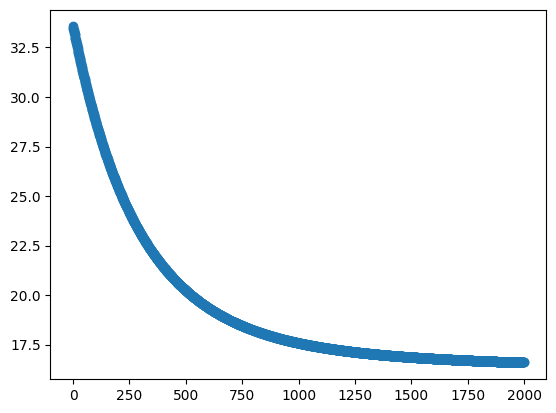

Model 2/4
0 33.64235184415804 [0.2435537844844062, 0.7899804572548806, 0.002477470506540391, 0.01088993533600242] -0.002652456908452717
20 32.5346115706886 [0.31709877086703747, 0.7893457249839644, -0.027970578750711943, -0.005735946391764541] -0.008607565090360291
40 31.506467777846645 [0.3876114349158822, 0.7883539786333867, -0.058104232690167484, -0.021763651359280534] -0.014594834797671017
60 30.551202285229426 [0.4552575539153949, 0.7874842996766971, -0.0878656192831147, -0.0371758915988967] -0.020604467792815825
80 29.663229191591604 [0.5201635763174599, 0.7867278638779539, -0.11724206869639563, -0.05198665922393834] -0.026633527710045117
100 28.83742007779358 [0.5824499504591915, 0.7860764188712774, -0.14622252211253176, -0.06621034030350914] -0.032679292495330435
120 28.069064230409605 [0.6422314290259027, 0.7855222519309185, -0.17479741238926255, -0.07986162826217237] -0.03873924032879592
140 27.353832522894983 [0.6996173568499826, 0.7850581555523418, -0.2029585529957869, -0.0

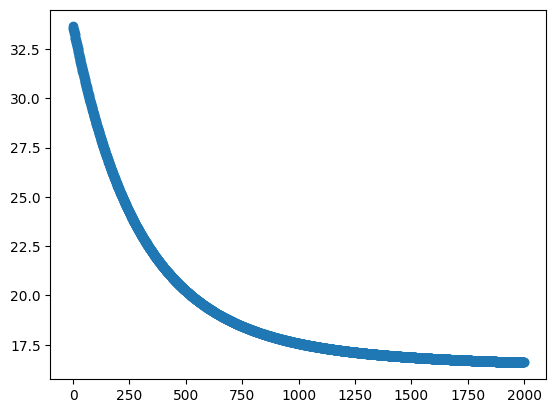

Model 3/4
0 33.20691820221625 [0.2437618578332684, 0.792331476261655, 0.0027817524886455365, 0.011150465674556034] -0.002608034601232445
20 32.10718040566744 [0.3181137755575584, 0.7904547078665092, -0.025953915489618933, -0.0033947957240921854] -0.008338395011555286
40 31.08842686389152 [0.38934391713646943, 0.7891076863890255, -0.05443610655528925, -0.017447402178050415] -0.014104647385042543
60 30.14381357566372 [0.4575734112956441, 0.7879141312759244, -0.08267355193042634, -0.031032576956946042] -0.019907532465684403
80 29.267414235093437 [0.522940871948865, 0.7868628721146913, -0.11064487839379206, -0.04415387097605383] -0.025743146974563178
100 28.453815663789634 [0.585577995230338, 0.785943482026073, -0.13833089500390297, -0.05681595781579673] -0.031607866138426616
120 27.69807017725287 [0.6456099275506175, 0.785146226018114, -0.1657144373507459, -0.0690244969509876] -0.037498325488727016
140 26.99565265090221 [0.7031556132325439, 0.7844620162251755, -0.19278022174973986, -0.080

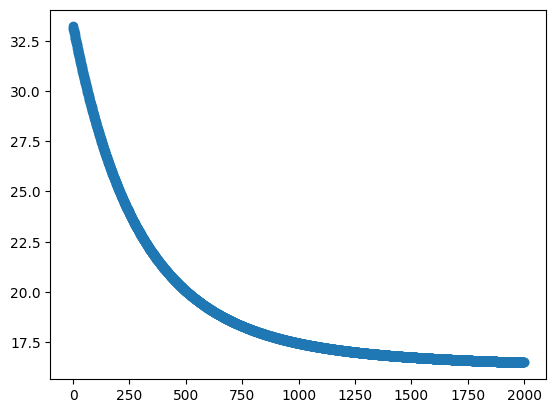

In [269]:
for i,model in enumerate(models):
    print(f'Model {i}/{k}')
    model.train(3e-4,2000,w_init,b_init)

In [270]:
mse_list = [None]*k

for i in range(k):
    tx = test[i].drop('Performance Index',axis=1,inplace=False).to_numpy()
    ty = test[i]['Performance Index'].to_numpy()
    mse_list[i] = models[i].test(tx,ty)

mean = np.mean(mse_list)
print(f'Overall mean mse: {mean}')

Overall mean mse: 33.05874646556619


In [275]:
def predict_k_fold(x):
    a = []
    for model in models:
        a.append(model.predict(x))
    return np.mean(a)

def k_fold_mse(testx,testy):
    mse = 0
    for i in range(len(testx)):
        y_pred = predict_k_fold(testx[i])
        mse+= (testy[i]-y_pred)**2
    mse/=len(testx)
    return mse

overall_test_x = overall_test_data.drop('Performance Index',axis=1,inplace=False).to_numpy()
overall_test_y = overall_test_data['Performance Index'].to_numpy()

k_fold_mse(overall_test_x,overall_test_y)


35.0025992362239

### Scikit-Learn's Linear Regression

In [233]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(train_data_x.to_numpy(),train_data_y.to_numpy())

LinearRegression()

In [234]:
lr2.score(test_data_x.to_numpy(), test_data_y.to_numpy())

0.9887007968620151

In [235]:
y_pred = lr2.predict(test_data_x.to_numpy())


mean_squared_error(test_data_y.to_numpy(), y_pred)

4.181379974575153